In [36]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score
from sklearn.metrics import classification_report, roc_curve, average_precision_score, precision_recall_curve



In [37]:
train = pd.read_csv('train.csv/train.csv')
test = pd.read_csv('test.csv/test.csv')

print("shape of the train", train.shape)
print("shape of the test", test.shape)


shape of the train (26570, 26)
shape of the test (20775, 25)


In [38]:
print("number of unique rows in train",len(train["id"].unique()))
print("number of unique rows in test", len(test["id"].unique()))

number of unique rows in train 26570
number of unique rows in test 20775


In [39]:
train.head(2)

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0


In [40]:
train.product_code.value_counts()

C    5765
E    5343
B    5250
D    5112
A    5100
Name: product_code, dtype: int64

In [41]:
train.attribute_0.value_counts()

material_7    21320
material_5     5250
Name: attribute_0, dtype: int64

In [42]:
test.head(2)

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.07,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037


In [43]:
test.product_code.value_counts()

F    5422
I    5228
G    5107
H    5018
Name: product_code, dtype: int64

In [44]:
test.attribute_0.value_counts()

material_5    10529
material_7    10246
Name: attribute_0, dtype: int64

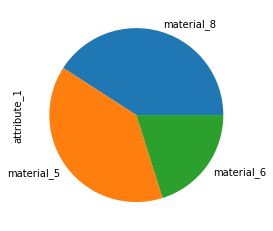

In [45]:
train.attribute_1.value_counts().plot.pie();

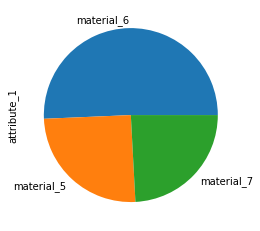

In [46]:
test.attribute_1.value_counts().plot.pie();

In [47]:
train.isnull().sum()

id                   0
product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

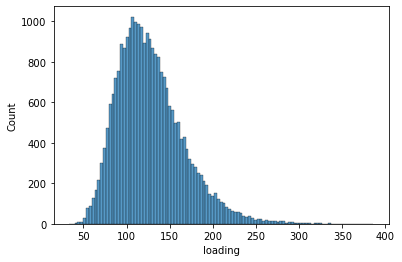

In [48]:
sns.histplot(data=train, x="loading");

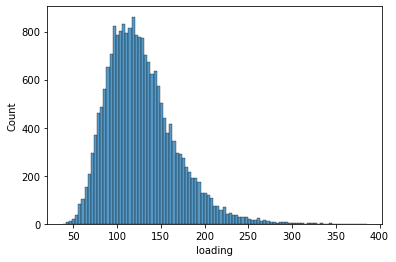

In [49]:
sns.histplot(data=test, x="loading");

In [50]:
# Droping the product_Code as this feature is have equal categories in train and test
train.drop("product_code", axis=1, inplace=True)
test.drop("product_code", axis=1, inplace=True)


In [51]:
train.dtypes

id                  int64
loading           float64
attribute_0        object
attribute_1        object
attribute_2         int64
attribute_3         int64
measurement_0       int64
measurement_1       int64
measurement_2       int64
measurement_3     float64
measurement_4     float64
measurement_5     float64
measurement_6     float64
measurement_7     float64
measurement_8     float64
measurement_9     float64
measurement_10    float64
measurement_11    float64
measurement_12    float64
measurement_13    float64
measurement_14    float64
measurement_15    float64
measurement_16    float64
measurement_17    float64
failure             int64
dtype: object

In [52]:
#Let's fill the loading feature with median
#Median_loading = df["loading"].median()
# df["loading"].fillna(df["loading"].mean(), inplace=True) filling with single columns
# df.apply(lambda x: x.fillna(x.mean(), axis=0))
for i in train.columns[train.isnull().any(axis=0)]:
    train[i].fillna(train[i].mean(), inplace=True)

for i in test.columns[test.isnull().any(axis=0)]:
    test[i].fillna(test[i].mean(), inplace=True)
    

In [53]:
test.isnull().sum()

id                0
loading           0
attribute_0       0
attribute_1       0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
dtype: int64

In [54]:
#split the attribute_2 and attribute_3
train["attribute_0"] = pd.factorize(train.attribute_0)[0]
train["attribute_1"] = pd.factorize(train.attribute_1)[0]

test["attribute_0"] = pd.factorize(test.attribute_0)[0]
test["attribute_1"] = pd.factorize(test.attribute_1)[0]

#df["product_code"] = pd.factorize(df.product_code)[0]


<AxesSubplot:>

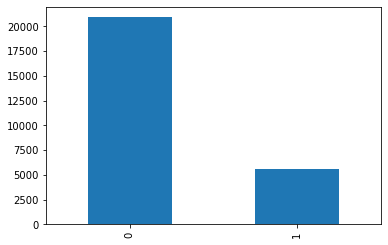

In [55]:
train.failure.value_counts().plot.bar()

In [56]:
X = train.drop("failure", axis=1)
y = train["failure"]

In [57]:
# ## Undersampling The Class Feature
# # Shuffle the Dataset.
# shuffled_df = X.sample(frac=1, random_state=5)
# # Faliure classes
# failure_df = shuffled_df.loc[shuffled_df['y']==1]
# #Randomly selecto bservations.
# non_failure_df = shuffled_df.loc[shuffled_df["y"]==0].sample(n=1000)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [59]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_SS = sc.fit_transform(X_train)
X_test_SS = sc.transform(X_test)
test = sc.transform(test)


In [65]:
X_train_SS.shape, y_train.shape, X_test_SS.shape, y_test.shape

((21256, 24), (21256,), (5314, 24), (5314,))

In [60]:
cols = X_train.columns
cols

Index(['id', 'loading', 'attribute_0', 'attribute_1', 'attribute_2',
       'attribute_3', 'measurement_0', 'measurement_1', 'measurement_2',
       'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6',
       'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10',
       'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14',
       'measurement_15', 'measurement_16', 'measurement_17'],
      dtype='object')

In [62]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# #Create an object of the classifier.
bbc = BalancedBaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=300, max_depth=200, n_jobs=-1),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=10)              
                               
#Training the model
bbc.fit(X_train_SS, y_train)
ypred = bbc.predict(X_test_SS)

print("test accurancy", accuracy_score(y_test, ypred))
print("test number of correctly predicted", accuracy_score(y_test, ypred, normalize=False))
print('Classification report:\n', classification_report(y_test, ypred))
print('Confusion matrix:\n', confusion_matrix(y_test, ypred))

print("F1 Score: {}".format(f1_score(y_test, ypred)))
print("Recall score: {}".format(recall_score(y_test, ypred)))
print("Precision score: {}".format(precision_score(y_test, ypred)))
print("AUC score: {}".format(roc_auc_score(y_test, ypred)))

test accurancy 0.6938276251411366
test number of correctly predicted 3687
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      4217
           1       0.26      0.27      0.26      1097

    accuracy                           0.69      5314
   macro avg       0.54      0.54      0.54      5314
weighted avg       0.70      0.69      0.69      5314

Confusion matrix:
 [[3395  822]
 [ 805  292]]
F1 Score: 0.26413387607417455
Recall score: 0.26618049225159524
Precision score: 0.2621184919210054
AUC score: 0.5356275949519774


In [66]:
# from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import SMOTE
# # Resampling the minority class. The strategy can be changed as required.
# sm = SMOTE(sampling_strategy='minority', random_state=42)
# # Fit the model to generate the data.
# oversampled_X, oversampled_Y = sm.fit_resample(X, y)
# oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [67]:
#oversampled.failure.value_counts()

In [68]:
# X_smot = oversampled.drop("failure", axis=1)
# y_smot = oversampled.failure

# X_train_smot, X_test_smot, y_train_smot, y_test_smot = train_test_split(X_smot, y_smot, test_size=0.3, random_state=0)

In [69]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train_smot = sc.fit_transform(X_train_smot)
# X_test_smot = sc.transform(X_test_smot)
# test = sc.transform(test)


In [74]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


random_forest = RandomForestClassifier(
    n_estimators=20, max_depth=1, n_jobs=-1, random_state=123
)

random_forest.fit(X_train_SS, y_train)


predict = random_forest.predict(X_train_SS)

print("Train accurancy", accuracy_score(y_train, predict))
#If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
print("Train number of correctly predicted", accuracy_score(y_train, predict, normalize=False))

pred_test = random_forest.predict(X_test_SS)
print("test accurancy", accuracy_score(y_test, pred_test))
print("test number of correctly predicted", accuracy_score(y_test, pred_test, normalize=False))
print('Classification report:\n', classification_report(y_test, pred_test))
print('Confusion matrix:\n', confusion_matrix(y_test, pred_test))

print("F1 Score: {}".format(f1_score(y_test, pred_test)))
print("Recall score: {}".format(recall_score(y_test, pred_test)))
print("Precision score: {}".format(precision_score(y_test, pred_test)))

print("AUC score: {}".format(roc_auc_score(y_test, pred_test)))


Train accurancy 0.7858487015430937
Train number of correctly predicted 16704
test accurancy 0.7935641701166729
test number of correctly predicted 4217
Classification report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      4217
           1       0.00      0.00      0.00      1097

    accuracy                           0.79      5314
   macro avg       0.40      0.50      0.44      5314
weighted avg       0.63      0.79      0.70      5314

Confusion matrix:
 [[4217    0]
 [1097    0]]
F1 Score: 0.0
Recall score: 0.0
Precision score: 0.0
AUC score: 0.5


C:\Users\shanusingh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shanusingh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shanusingh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [77]:
# Prdiction on test data with model gradient_boosting
pred = random_forest.predict(test)
submittion = pd.read_csv('sample_submission.csv')
submittion["failure"] = pred
submittion.to_csv('submittion-randomForest_AUC_5.csv', index=False)

In [76]:
gradient_boosting = GradientBoostingClassifier(n_estimators=200, max_depth=21, random_state=10)
gradient_boosting.fit(X_train_SS, y_train)

pred = gradient_boosting.predict(X_train_SS)

print("Train accurancy", accuracy_score(y_train, pred))
#If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
print("Train number of correctly predicted", accuracy_score(y_train, predict, normalize=False))

pred_test = gradient_boosting.predict(X_test_SS)
print("test accurancy", accuracy_score(y_test, pred_test))
print("test number of correctly predicted", accuracy_score(y_test, pred_test, normalize=False))
print('Classification report:\n', classification_report(y_test, pred_test))
print('Confusion matrix:\n', confusion_matrix(y_test, pred_test))

print("F1 Score: {}".format(f1_score(y_test, pred_test)))
print("Recall score: {}".format(recall_score(y_test, pred_test)))
print("Precision score: {}".format(precision_score(y_test, pred_test)))

print("AUC score: {}".format(roc_auc_score(y_test, pred_test)))


Train accurancy 1.0
Train number of correctly predicted 16704
test accurancy 0.7933759879563418
test number of correctly predicted 4216
Classification report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      4217
           1       0.47      0.01      0.02      1097

    accuracy                           0.79      5314
   macro avg       0.63      0.50      0.45      5314
weighted avg       0.73      0.79      0.71      5314

Confusion matrix:
 [[4207   10]
 [1088    9]]
F1 Score: 0.016129032258064516
Recall score: 0.008204193254329991
Precision score: 0.47368421052631576
AUC score: 0.5029164196055856


In [79]:
#The RandomTreesEmbedding is an unsupervised method and thus does not required to be trained independently.
from sklearn.ensemble import RandomTreesEmbedding

random_tree_embedding = RandomTreesEmbedding(n_estimators=1000, max_depth=100, random_state=10)

random_tree_embedding.fit(X_train_SS, y_train)

#predict = random_tree_embedding.predict(X_train_smot)

RandomTreesEmbedding(max_depth=100, n_estimators=1000, random_state=10)

In [80]:
# Now, we will create three pipelines that will use the above embedding as a preprocessing stage.

# The random trees embedding can be directly pipelined with the logistic regression because it is a standard scikit-learn transformer.

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

rt_model = make_pipeline(random_tree_embedding, LogisticRegression(max_iter=2000, penalty="l2"))
rt_model.fit(X_train_SS, y_train)

predict = rt_model.predict(X_train_SS)

# from sklearn.metrics import accuracy_score
print("Train accurancy", accuracy_score(y_train, predict))
#If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
print("Train number of correctly predicted", accuracy_score(y_train, predict, normalize=False))

pred_test = rt_model.predict(X_test_SS)
print("Test accurancy", accuracy_score(y_test, pred_test))
print("Test number of correctly predicted", accuracy_score(y_test, pred_test, normalize=False))

print('Classification report:\n', classification_report(y_test, pred_test))
print('Confusion matrix:\n', confusion_matrix(y_test, pred_test))

print("F1 Score: {}".format(f1_score(y_test, pred_test)))
print("Recall score: {}".format(recall_score(y_test, pred_test)))
print("Precision score: {}".format(precision_score(y_test, pred_test)))

print("AUC score: {}".format(roc_auc_score(y_test, pred_test)))



Train accurancy 1.0
Train number of correctly predicted 21256
Test accurancy 0.7935641701166729
Test number of correctly predicted 4217
Classification report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      4217
           1       0.00      0.00      0.00      1097

    accuracy                           0.79      5314
   macro avg       0.40      0.50      0.44      5314
weighted avg       0.63      0.79      0.70      5314

Confusion matrix:
 [[4217    0]
 [1097    0]]
F1 Score: 0.0
Recall score: 0.0
Precision score: 0.0
AUC score: 0.5


C:\Users\shanusingh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shanusingh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shanusingh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [48]:
# Prdiction on test data with model gradient_boosting
pred = rt_model.predict(test)
submittion = pd.read_csv('sample_submission.csv')
submittion["failure"] = pred
submittion.to_csv('submittion-rt.csv', index=False)

In [83]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder

def rf_apply(X, model):
    return model.apply(X)


rf_leaves_yielder = FunctionTransformer(rf_apply, kw_args={"model": random_forest})

rf_model = make_pipeline(
    rf_leaves_yielder,
    OneHotEncoder(handle_unknown="ignore"),
    LogisticRegression(max_iter=200,tol=0.02, C=0.5, penalty='l2'),
)
rf_model.fit(X_train_SS, y_train)

predict = rf_model.predict(X_train_SS)

from sklearn.metrics import accuracy_score
print("Train accurancy", accuracy_score(y_train, predict))
#If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
print("Train number of correctly predicted", accuracy_score(y_train, predict, normalize=False))

pred_test = rf_model.predict(X_test_SS)
print("Train accurancy", accuracy_score(y_test, pred_test))
print("Train number of correctly predicted", accuracy_score(y_test, pred_test, normalize=False))

print("test accurancy", accuracy_score(y_test, pred_test))
print("test number of correctly predicted", accuracy_score(y_test, pred_test, normalize=False))
print('Classification report:\n', classification_report(y_test, pred_test))
print('Confusion matrix:\n', confusion_matrix(y_test, pred_test))

print("F1 Score: {}".format(f1_score(y_test, pred_test)))
print("Recall score: {}".format(recall_score(y_test, pred_test)))
print("Precision score: {}".format(precision_score(y_test, pred_test)))

print("AUC score: {}".format(roc_auc_score(y_test, pred_test)))


Train accurancy 0.7858487015430937
Train number of correctly predicted 16704
Train accurancy 0.7928114414753481
Train number of correctly predicted 4213
test accurancy 0.7928114414753481
test number of correctly predicted 4213
Classification report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      4217
           1       0.00      0.00      0.00      1097

    accuracy                           0.79      5314
   macro avg       0.40      0.50      0.44      5314
weighted avg       0.63      0.79      0.70      5314

Confusion matrix:
 [[4213    4]
 [1097    0]]
F1 Score: 0.0
Recall score: 0.0
Precision score: 0.0
AUC score: 0.4995257291913683


In [50]:
# Prdiction on test data with model gradient_boosting
pred = rf_model.predict(test)
submittion = pd.read_csv('sample_submission.csv')
submittion["failure"] = pred
submittion.to_csv('submittion-1.csv', index=False)

In [84]:
def gbdt_apply(X, model):
    return model.apply(X)[:, :, 0]

gbdt_leaves_yielder = FunctionTransformer(gbdt_apply, kw_args={"model": gradient_boosting}
)

gbdt_model = make_pipeline(
    gbdt_leaves_yielder,
    OneHotEncoder(handle_unknown="ignore"),
    LogisticRegression(max_iter=2000,tol=0.01, C=0.5, penalty='l2'),
)
gbdt_model.fit(X_train_SS, y_train)

predict = gbdt_model.predict(X_train_SS)

from sklearn.metrics import accuracy_score
print("Train accurancy", accuracy_score(y_train, predict))
#If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
print("Train number of correctly predicted", accuracy_score(y_train, predict, normalize=False))

pred_test = gbdt_model.predict(X_test_SS)
print("Train accurancy", accuracy_score(y_test, pred_test))
print("Train number of correctly predicted", accuracy_score(y_test, pred_test, normalize=False))
print(confusion_matrix(y_test, pred_test))


print("AUC score: {}".format(roc_auc_score(y_test, pred_test)))

Train accurancy 1.0
Train number of correctly predicted 21256
Train accurancy 0.7847196085811066
Train number of correctly predicted 4170
[[4149   68]
 [1076   21]]
AUC score: 0.5015089550499789


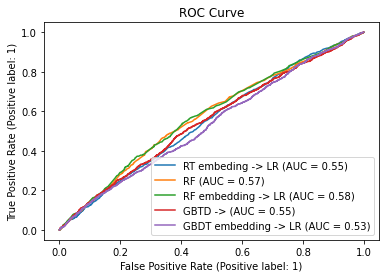

In [85]:
#We can finally show the different ROC curves for all the models.
#from sklearn.metrics import RocCurveDisplay

from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()

models = [
    ("RT embeding -> LR", rt_model),
    ("RF", random_forest),
    ("RF embedding -> LR", rf_model),
    ("GBTD ->", gradient_boosting),
    ("GBDT embedding -> LR", gbdt_model),
]



model_displays = {}
for name, pipeline in models:
    model_displays['name'] = RocCurveDisplay.from_estimator(
        pipeline, X_test_SS, y_test, ax=ax, name=name
    )
    
_ = ax.set_title("ROC Curve");

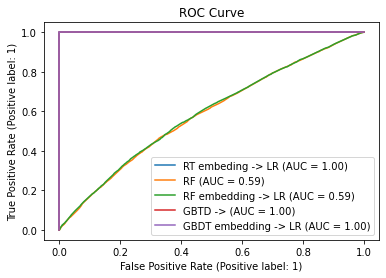

In [87]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()

models = [
    ("RT embeding -> LR", rt_model),
    ("RF", random_forest),
    ("RF embedding -> LR", rf_model),
    ("GBTD ->", gradient_boosting),
    ("GBDT embedding -> LR", gbdt_model),
]



model_displays = {}
for name, pipeline in models:
    model_displays['name'] = RocCurveDisplay.from_estimator(
        pipeline, X_train_SS, y_train, ax=ax, name=name
    )
    
_ = ax.set_title("ROC Curve");

https://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-transformation-py

#### Grid search for hyper-parameter tuning

In [54]:
# classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)
# from sklearn.model_selection import GridSearchCV

# # Create the parameter grid based on the results of random search 
# params = {
#     'max_depth':[3, 15, 21, 50],
#     "min_samples_leaf":[5, 10, 15, 31],
#     "max_features": [9, 15, 21, 50],
#     "n_estimators":[10, 30, 100, 200]
# }

# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params,
#                            cv=4,n_jobs=-1, verbose=1, scoring="accuracy")


# grid_search.fit(X_train_smot, y_train_smot)

http://rasbt.github.io/mlxtend/user_guide/classifier/StackingCVClassifier/

In [55]:
# Dependency for mlxtend
import six
import sys
sys.modules['sklearn.externals.six'] = six
#import mlrose
from mlxtend.classifier import StackingCVClassifier
from sklearn import model_selection

In [56]:
stacking = StackingCVClassifier(classifiers=[random_forest, gradient_boosting, rf_model], 
                                meta_classifier = rt_model, use_probas=True, cv=4)

# Do CV
for clf, label in zip([random_forest, gradient_boosting, rf_model, rt_model, stacking],
                     ["Random Forest",
                     "Gradient Boosting",
                     "RF Model",
                      "RT Model"
                     "StackingClassifier"]):
    
    scores = model_selection.cross_val_score(clf, X_train_smot,y_train_smot, cv=4, scoring="roc_auc")
    print("Training Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Training Accuracy: 0.86 (+/- 0.00) [Random Forest]
Training Accuracy: 0.88 (+/- 0.00) [Gradient Boosting]
Training Accuracy: 1.00 (+/- 0.00) [RF Model]
Training Accuracy: 0.91 (+/- 0.00) [RT ModelStackingClassifier]


In [59]:
stacking.fit(X_train_smot, y_train_smot)
pred_train = stacking.predict(X_train_smot.values)
print("Train accurancy", accuracy_score(y_train_smot, pred_train))
print("Train number of correctly predicted", accuracy_score(y_train_smot, pred_train, normalize=False))
confusion_matrix(y_train_smot, pred_train)

MemoryError: Unable to allocate 335. MiB for an array with shape (87864003,) and data type int32

In [ ]:
pred_test = stacking.predict(X_test_smot.values)
print("Train accurancy", accuracy_score(y_test_smot, pred_test))
print("Train number of correctly predicted", accuracy_score(y_test_smot, pred_test, normalize=False))
confusion_matrix(y_test_smot, pred_test)

In [ ]:
# Prdiction on test data with model gradient_boosting
pred = stacking.predict(test)
submittion = pd.read_csv('sample_submission.csv')
submittion["failure"] = pred
submittion.to_csv('submittion-stacking.csv', index=False)